In [92]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read dataframe from sklearn

In [93]:
from sklearn.datasets import load_boston
boston = load_boston()

#### Data Description

In [94]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Names of features in boston dataset

In [95]:
#Feature names.... Meaning of each can be found at the above cell
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Convert data to Pandas DataFrame for easy data analysis

In [134]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [136]:
# Check the firts five observation
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Append target to dataframe

In [137]:
df['MEDV'] = boston.target

In [138]:
# Check the firts five observation
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Check the quality of the data; the data types and number of null cases at a glance

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


#### Basic descriptive statistics of the data: Measure of central location and dispersion

In [106]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### A plot to show the relationship of the data variables

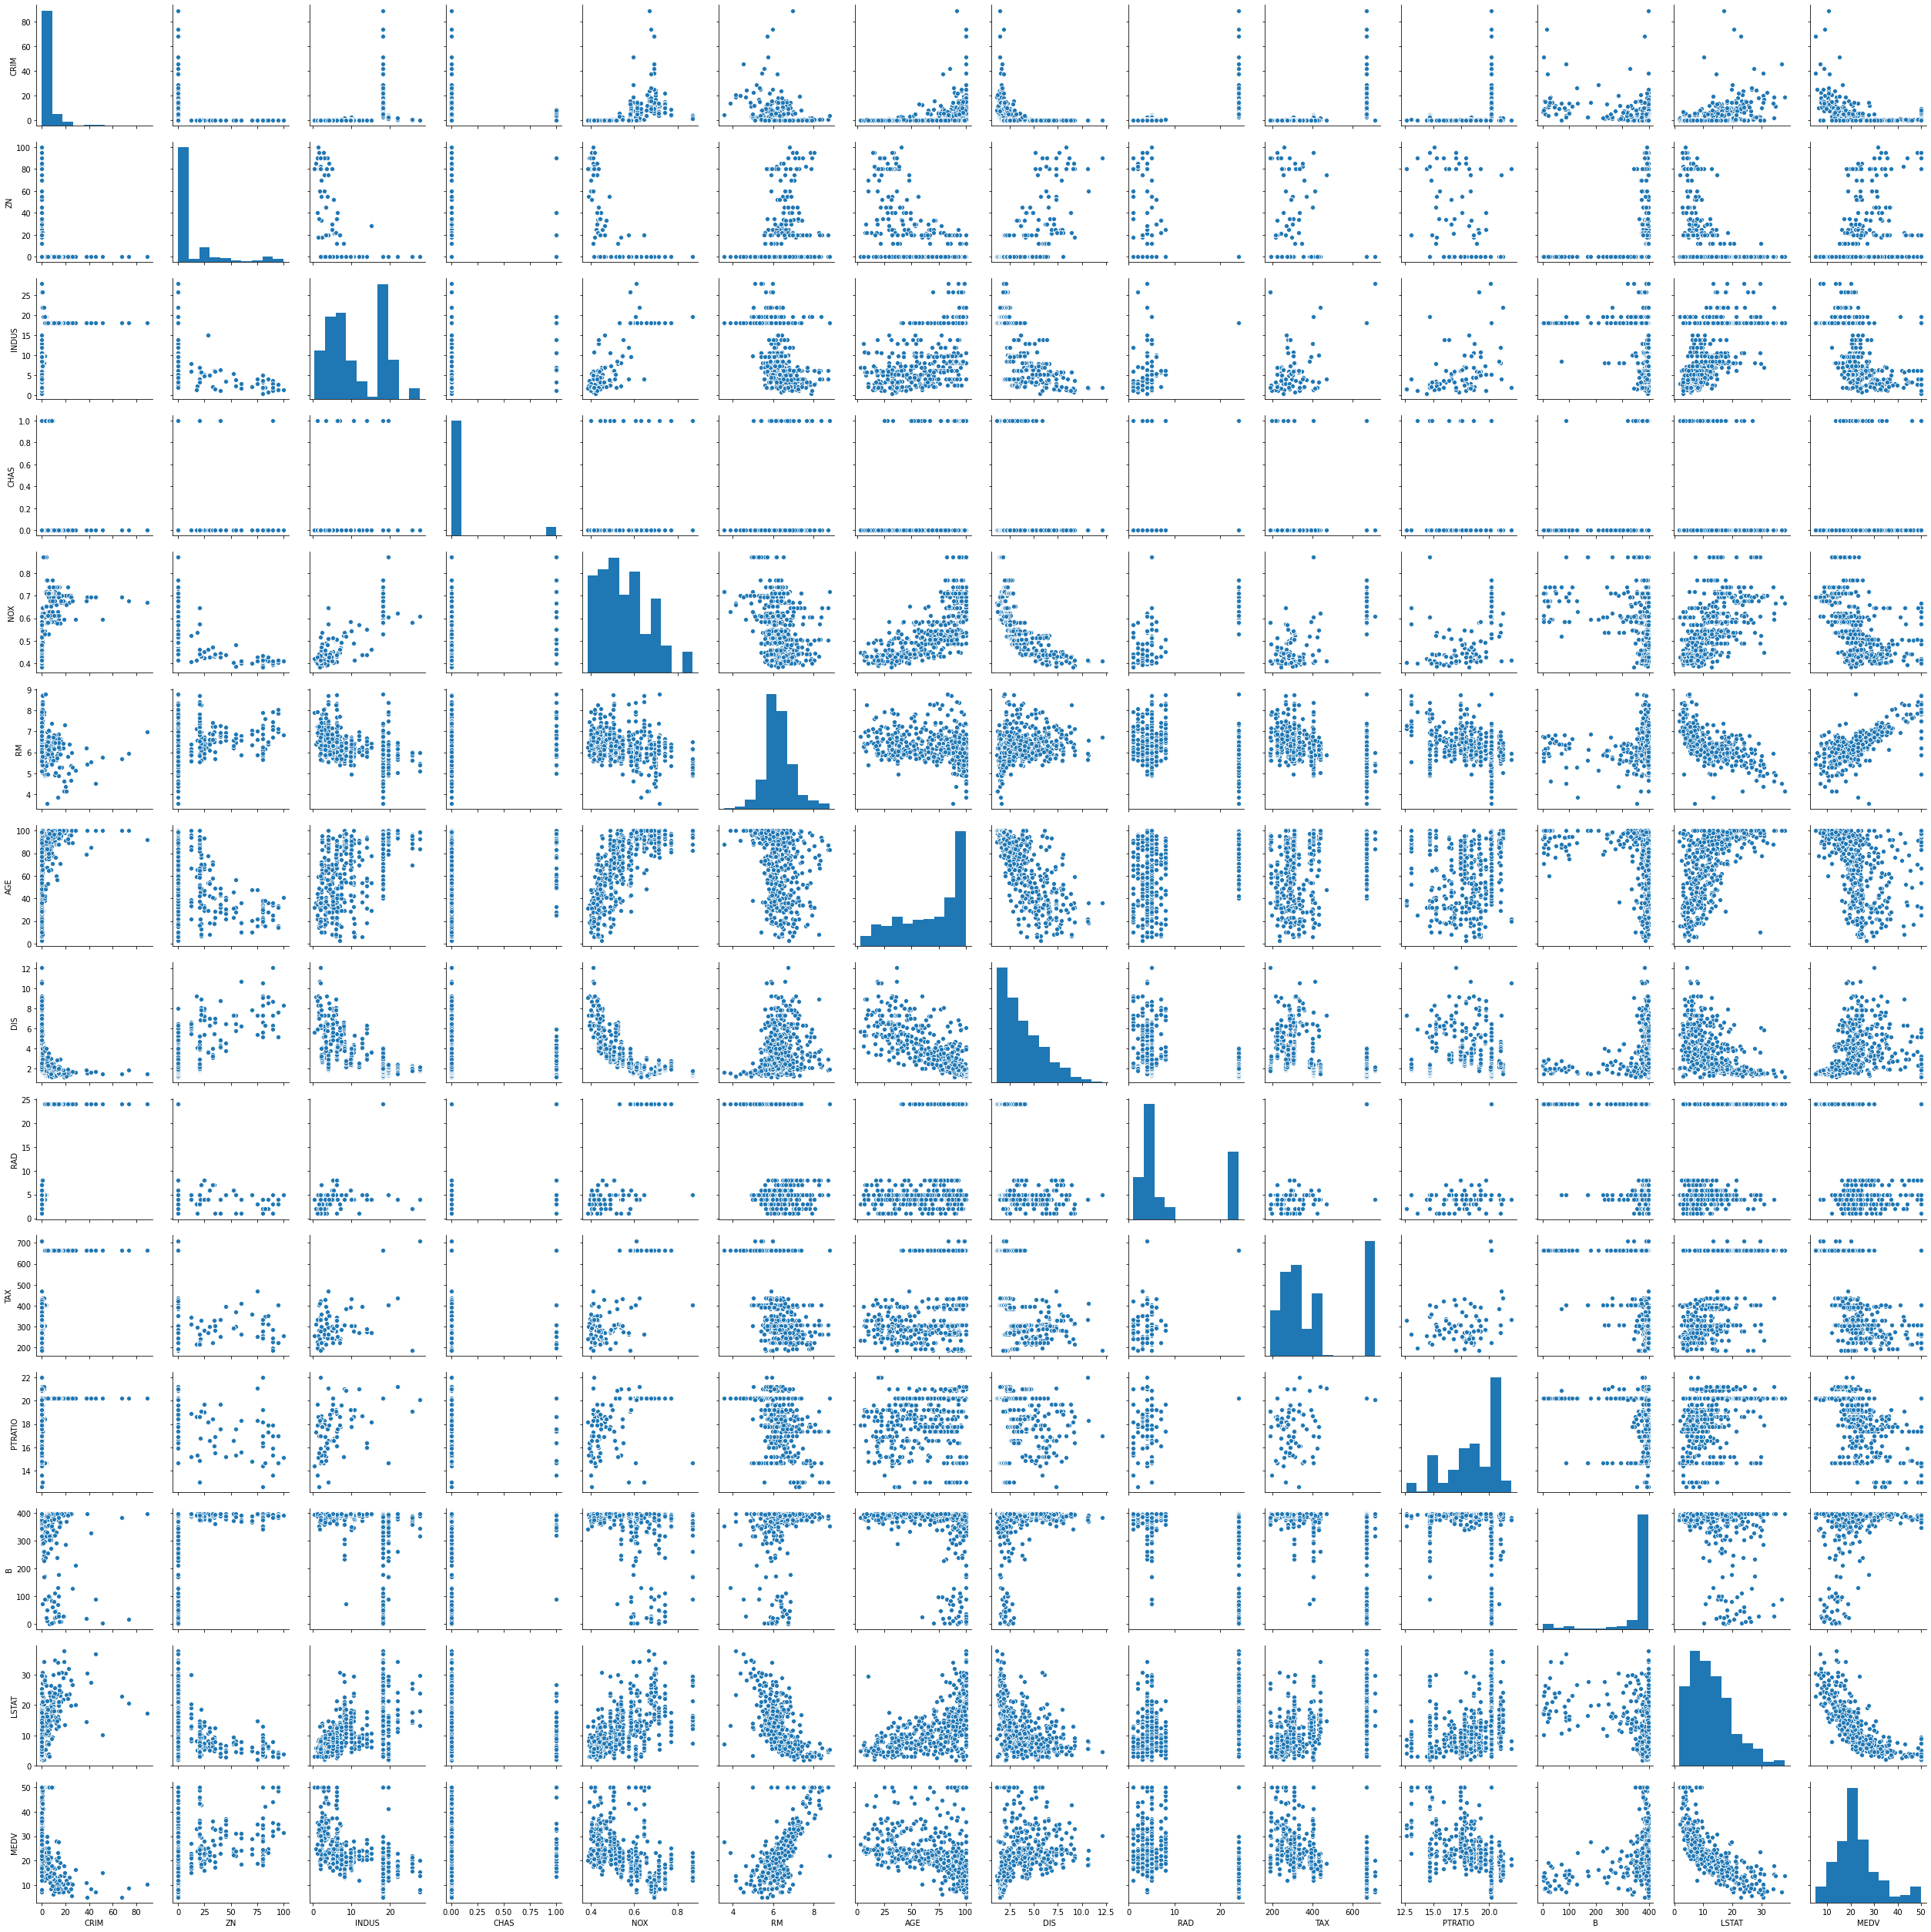

In [107]:
sns.pairplot(df)

### A distribution plot of each variables in the data using subplots

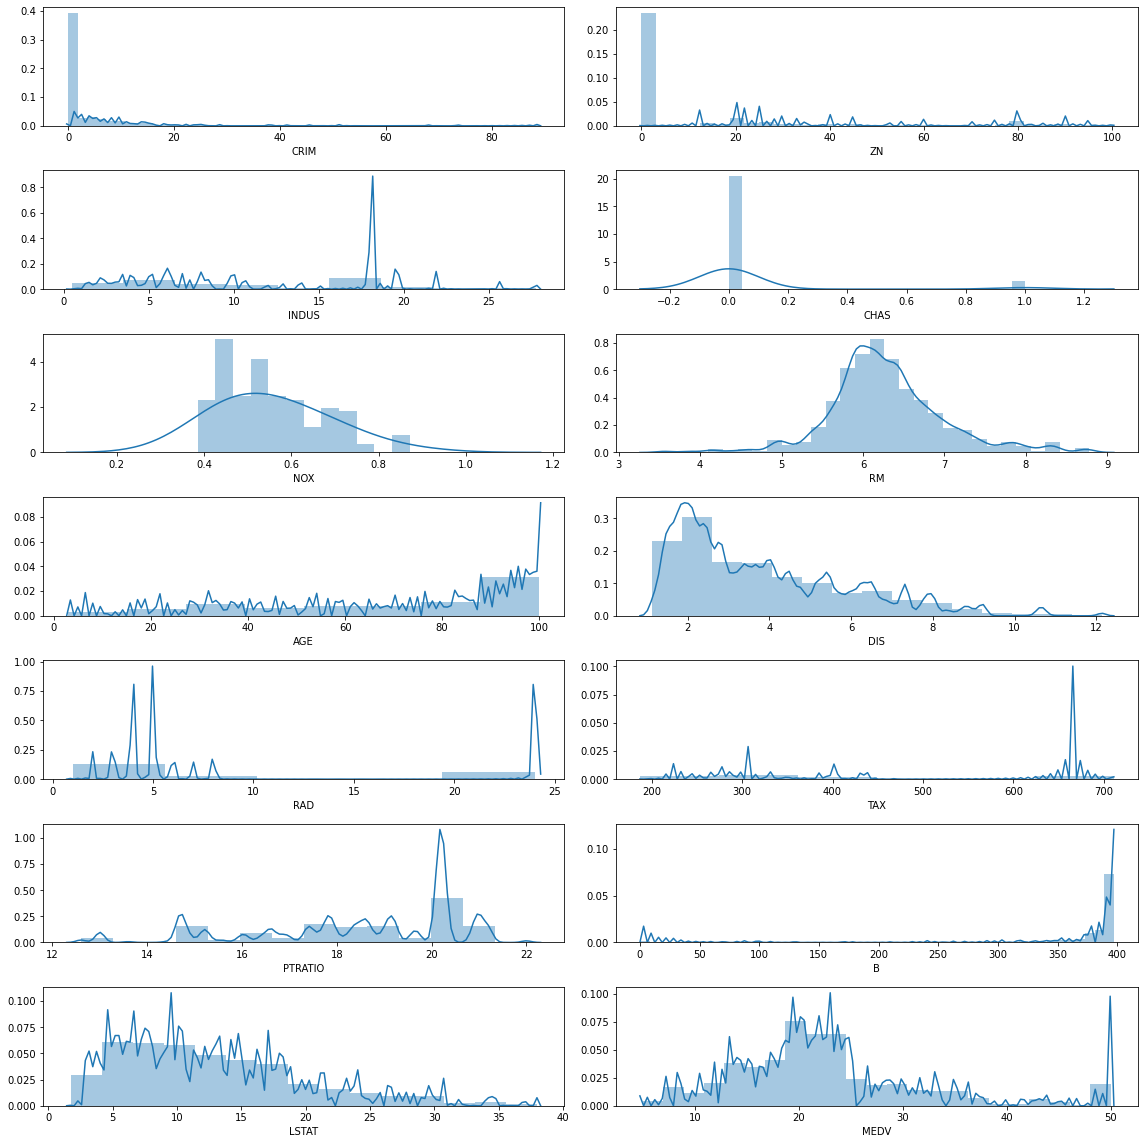

In [150]:
rows = 7
cols = 2

fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize = (16,16))
col = df.columns
index = 0


for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = ax[i][j],kde_kws={'bw':0.1}) # Note I got an error here and got it solved by add kde_kws = {'bw':0.1}
        index = index + 1
        
        
plt.tight_layout()

#### Correlation using heatmap
Heatmap shows the level of association of the variales (correlation)
* 0.5-1.0 for  high correlation
* 0.0 - 0.49 for low correlation

Note: Correltion could be positive or negative too

<AxesSubplot:>

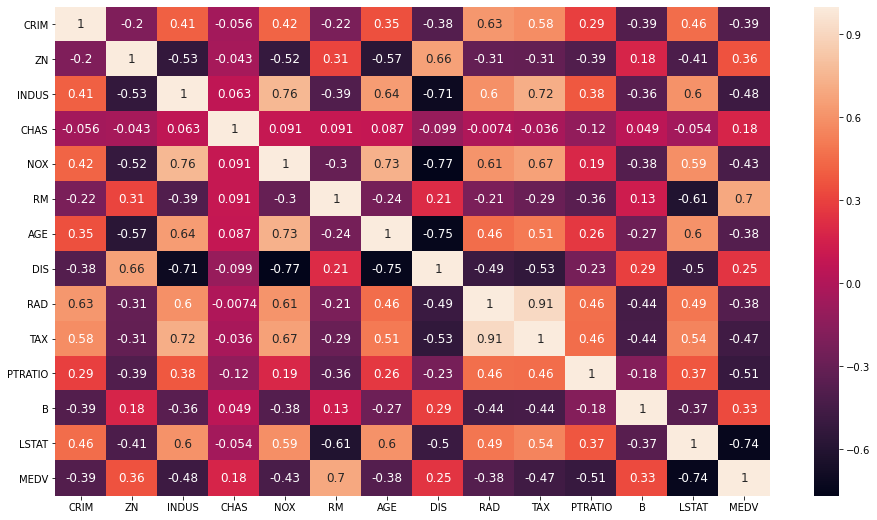

In [112]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.heatmap(df.corr(), annot = True, annot_kws={'size': 12})

### Function to extract well correlated feature with target for a given threshold

In [139]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [140]:
threshold = 0.4
corr_value = getCorrelatedFeature(df.corr()['MEDV'], threshold)

In [141]:
corr_value.index.values

array(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype=object)

### This is the newly extracted dataframe

In [142]:
correlated_data = df[corr_value.index]
correlated_data.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


### Separate X and y for modelling

In [118]:
X = correlated_data.drop(labels=['MEDV'], axis = 1)
y = correlated_data['MEDV']

### Split the dataset into 67% train and 33% test

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1)

### Initialize Linear Regression model

In [121]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

### Train Linear regression model

In [122]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predict on test using the mathematical equation gotten from training

In [123]:
predictions = lm.predict(X_test)

### Check relationship between actual value and predicted value using scatter plot

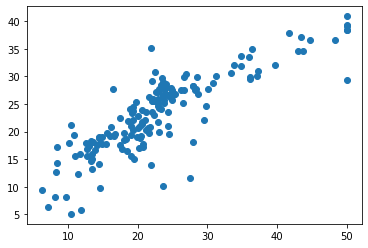

In [144]:
plt.scatter(y_test,predictions)

### Check the distribution of residual

<AxesSubplot:xlabel='MEDV'>

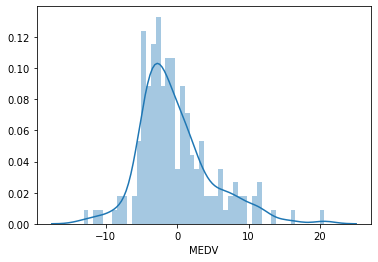

In [145]:
sns.distplot((y_test-predictions),bins=50)

In [146]:
#Intercept of the model
lm.intercept_

23.499237053545095

In [147]:
#The coefficient or weights
lm.coef_

array([ 1.08016127e-01, -7.91996313e+00,  4.30011673e+00, -2.02636592e-04,
       -9.66142294e-01, -5.36384366e-01])

### Custom Linear model function

In [130]:
def lin_func(values, coefficients=lm.coef_, y_axis=lm.intercept_):
    return np.dot(values, coefficients) + y_axis

### Compare prediction and actual value of test

In [133]:
from random import randint
for i in range(5):
    index = randint(0,len(df)-1)
    sample = df.iloc[index][corr_value.index.values].drop('MEDV')
    print( 'PREDICTION: ', round(lin_func(sample),2),
            ' // REAL: ',df.iloc[index]['MEDV'],
            ' // DIFFERENCE: ', round(round(lin_func(sample),2) - df.iloc[index]['MEDV'],2) )

PREDICTION:  19.12  // REAL:  22.4  // DIFFERENCE:  -3.28
PREDICTION:  18.48  // REAL:  19.4  // DIFFERENCE:  -0.92
PREDICTION:  17.66  // REAL:  17.5  // DIFFERENCE:  0.16
PREDICTION:  17.26  // REAL:  8.4  // DIFFERENCE:  8.86
PREDICTION:  27.91  // REAL:  24.7  // DIFFERENCE:  3.21
